In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import random

def get_x_t0_t2_hyper(m):
    N = 100
    dt = 1.0 * 3.14 / (N - 1)

    ix0 = 10
    t0 = -3.1415/2.0 + dt * np.array(range(ix0, N - ix0, 1)) # except last point
    t1 = -t0 # dt * np.array(range(1, N, 1))
    x0 = list(map(lambda x: m / math.cos(x), t0))
    x1 = list(map(lambda x: m / math.cos(x), t1))

    return x0, x1, t0, t1
def get_y_hyper(x0, m):
    m2 = m*m
    y0 = list( map(lambda x: (x*x - m2), x0))
    y0 = list( map(lambda x: math.sqrt( math.fabs(x)), y0 ) )
    y0 = np.array(y0)
    return y0
def forward_y_hyper(m, maxx=10):
    N = 100
    dt = 2.0 * 3.14 / (N - 1)
    ix0 = 1
    t = -3.1415 / 2.0 + dt * np.array(range(ix0, N-ix0, 1))
    x = list(map(lambda x: m / math.cos(x), t))
    y = list(map(lambda x: m * math.tan(x), t))

    x = np.array(x)
    y = np.array(y)

    k1 = x > -maxx-abs(m)
    x = x[k1]
    y = y[k1]

    k1 = x < maxx+abs(m)
    x = x[k1]
    y = y[k1]

    return x, y
def lam_hyper (yy, yobs):
    dy = yy - yobs
    lam = -dy / (2 * yy)
    return lam



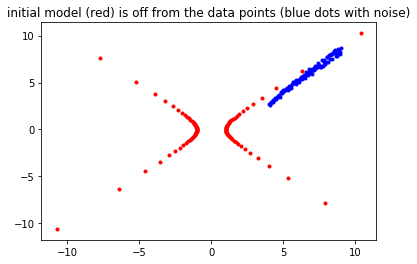

In [2]:
get_x_t0_t2 = get_x_t0_t2_hyper
get_y = get_y_hyper
forward_y = forward_y_hyper
lam = lam_hyper

#true model
m0 = 3
# initial model
m = m0-2

# observed data: x0, yobs
#x0, x1, t0, t1 = get_x_t0_t2(m0)
x0 = 4 + 0.05 * np.array(range(101))
yobs = get_y(x0, m0)

#add some noise to test stabiloity of the minimization
Anoise = 0.1
noise = Anoise * (-0.5 + np.array( [random.random() for i in range(yobs.__len__())]))
yobs = yobs + abs(yobs) * noise

#Plot
plt.scatter(x0, yobs, marker = ".", color='blue')
x,y = forward_y(m)
plt.scatter(x,y, marker = ".", color = "red")
plt.title('initial model (red) is off from the data points (blue dots with noise)')
plt.show()

In [3]:
# Gradient ddescent: iterations and learning rate
n = 20
alpha = 0.05

errs = []
mm = [m]
for i in range(n):
    y = get_y(x0, m)
    dy = y - yobs
    err = 0.5 * sum(dy * dy)
    errs.append(err)

    lamd = lam(y, yobs)
    grad = -sum(lamd *(-2.0*m))

    m -= (alpha) * grad #(-sum( (y-yobs)/(-2.0*y) * (-2.0*m)))
    mm.append(m)
    #print(err)    

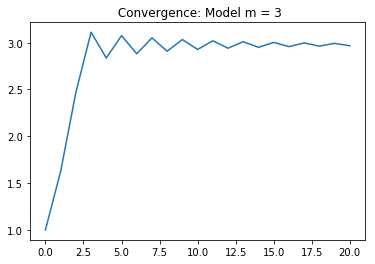

In [4]:
plt.plot(mm)
plt.title(' Convergence: Model m = ' + str(m0))
plt.show()

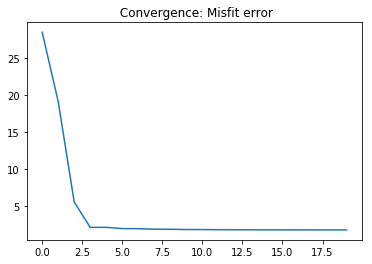

In [5]:
plt.plot(errs)
plt.title(' Convergence: Misfit error')
plt.show()

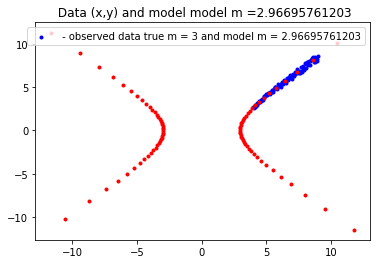

In [6]:
#Plot model, observed data, modeled data
# xm, ym = forward_y(m)
plt.scatter(x0, yobs,label= " - observed data true m = "+str(m0)+" and model m = " + str(m), marker = ".", color='blue')
x,y = forward_y(m)
plt.scatter(x,y, marker = ".", color = "red")
plt.title(' Data (x,y) and model model m =' + str(m))
plt.legend()
plt.show()